# TP2 Statistiques Agricoles


## Commençons par changer la répertoire de Travail


In [1]:
# Changement de répertoire de travail 
Nouveau_répertoire = 'C:\\Users\\Nora\\Desktop\\Isep2\\Semestre_2\\stat agr\\td2'
print(Nouveau_répertoire)


C:\Users\Nora\Desktop\Isep2\Semestre_2\stat agr\td2


## Importons les packages necessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Observation de la variable

In [3]:
data= pd.read_csv("base_TP2.csv")
data.head()

,ID,zone,commune,comcode,cropname,cprod,cqsold,cpg,cgift,cland,...,fertexp,mean_price,sum_cprod,sum_area,rendement_spec,autcons,autcons_spec,taux_autocons,sum_sup,part_sup
0,198,Diourbel-Fatick,Diouroup,4,Mil,820.0,0,300.0,70,6.0,...,0,357.14285,503508.0,1235.8121,407.43085,750.0,427525.0,84.909279,3034.0105,40.731968
1,149,Diourbel-Fatick,Diouroup,4,Mil,500.0,0,300.0,160,3.0,...,30000,357.14285,503508.0,1235.8121,407.43085,340.0,427525.0,84.909279,3034.0105,40.731968
2,146,Diourbel-Fatick,Diouroup,4,Mil,450.0,0,250.0,100,0.5,...,7000,357.14285,503508.0,1235.8121,407.43085,350.0,427525.0,84.909279,3034.0105,40.731968
3,196,Diourbel-Fatick,Diouroup,4,Mil,1090.0,0,300.0,90,4.5,...,0,357.14285,503508.0,1235.8121,407.43085,1000.0,427525.0,84.909279,3034.0105,40.731968
4,236,Diourbel-Fatick,Diouroup,4,Mil,500.0,0,300.0,100,2.0,...,15000,357.14285,503508.0,1235.8121,407.43085,400.0,427525.0,84.909279,3034.0105,40.731968


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1205 non-null   int64  
 1   zone            1205 non-null   object 
 2   commune         1205 non-null   object 
 3   comcode         1205 non-null   int64  
 4   cropname        1205 non-null   object 
 5   cprod           1205 non-null   float64
 6   cqsold          1205 non-null   int64  
 7   cpg             1205 non-null   float64
 8   cgift           1205 non-null   int64  
 9   cland           1205 non-null   float64
 10  cvar            1205 non-null   int64  
 11  hh_men          1205 non-null   int64  
 12  hh_women        1205 non-null   int64  
 13  hh_myoung       1205 non-null   int64  
 14  hh_fyoung       1205 non-null   int64  
 15  hh_children     1205 non-null   int64  
 16  hh_fem          1205 non-null   int64  
 17  ag_men          1168 non-null   f

##  Préparation des données

####  1. explorer le dataset base_TP2

In [5]:
data["ID"].duplicated().any()

np.True_

 #### 2. Inspecter la variable ID. Comporte-t-elle des doublons? Pourquoi?

In [6]:
valeurs_uniques = data['cropname'].unique()
print(valeurs_uniques)

['Mil' 'Sorgho' 'Niébé' 'Arachides' 'Maïs' 'Riz']


##### Il y a des doublons car un même ménahes peut être inclus plusieurs fois dans notre base de données sachant qu'elle peut avoir beaucoup de cultures.

####  4.supprimons les observations pour lesquelles les productions et les superficies sont toutes deux nulles

In [7]:
data = data[~((data['cprod'] == 0) & (data['area'] == 0))]


#### 5. ramener `a missing les prix valant ”99"

In [8]:
data['cpg'] = data['cpg'].replace(99, np.nan)
data["cpg"].isnull().any()

np.False_

####  6.Imputer par la moyenne de la commune, les prix manquants.

In [9]:
data['cpg'] = data.groupby('commune')['cpg'].transform(lambda x: x.fillna(x.mean()))

##   Calcul d’indicateurs

####   1. Le rendement pour chaque spéculation

In [10]:
data['rendement'] = data['cprod'] / data['cland']
rendement_moyen = data.groupby('cropname')['rendement'].mean().reset_index()
print(rendement_moyen)


    cropname   rendement
0  Arachides  616.709913
1       Maïs  401.507158
2        Mil  539.837645
3      Niébé  255.713415
4        Riz  813.333333
5     Sorgho  307.550794


####   2. la part de la superficie totale occup´ ee par les diff´ erentes sp´ eculations

In [11]:
superficie_spec = data.groupby('cropname')['cland'].sum().reset_index()
superficie_spec["cland"]= superficie_spec["cland"]*100/ data['cland'].sum()
print(superficie_spec)

    cropname      cland
0  Arachides  44.886163
1       Maïs   8.275761
2        Mil  40.731967
3      Niébé   1.722473
4        Riz   0.146671
5     Sorgho   4.236966


#### 3. le taux d’autoconsommation de chaque spéculation

In [12]:
data["autocons"] = data["cprod"] - data["cqsold"] - data["cgift"]
auto_cons_taux = data.groupby('cropname')['autocons'].sum().reset_index()

# Calculate the percentage of total autocons for each crop
auto_cons_taux["autocons_t"] = auto_cons_taux["autocons"] * 100 / data['autocons'].sum()

print(auto_cons_taux)


    cropname  autocons  autocons_t
0  Arachides  269852.0   33.303652
1       Maïs   78774.5    9.721916
2        Mil  427525.0   52.762788
3      Niébé    7362.0    0.908578
4        Riz    1758.0    0.216963
5     Sorgho   25006.0    3.086103


#### 4. l’indice de diversité des cultures

In [13]:
def indice_diversite(data, surface_col='cland', culture_col='cropname', variete_col='cvar'):
    """
    Calcule un indice de diversité tenant compte du nombre de variétés par culture.

    Formule :
        1 - ∑ (1 / C_i) * (x_i / ∑ x_i)^2
    """
    import numpy as np

    # Agréger les superficies et les variétés par culture
    df = data.groupby(culture_col).agg({
        surface_col: 'sum',
        variete_col: 'max'  # ou 'mean' selon ton jeu de données
    }).reset_index()

    total_surface = df[surface_col].sum()

    if total_surface == 0:
        return 0

    somme = 0
    for _, row in df.iterrows():
        xi = row[surface_col]
        ci = row[variete_col]
        if ci > 0:
            proportion = xi / total_surface
            somme += (1 / ci) * (proportion ** 2)

    indice = 1 - somme
    return indice



In [14]:
x=indice_diversite(data,"cland", "cropname", "cvar")
print(x)

0.9996386660415341


## Visualisation

#### 1. la part des sp´eculations et termes de superficie occup´ ee

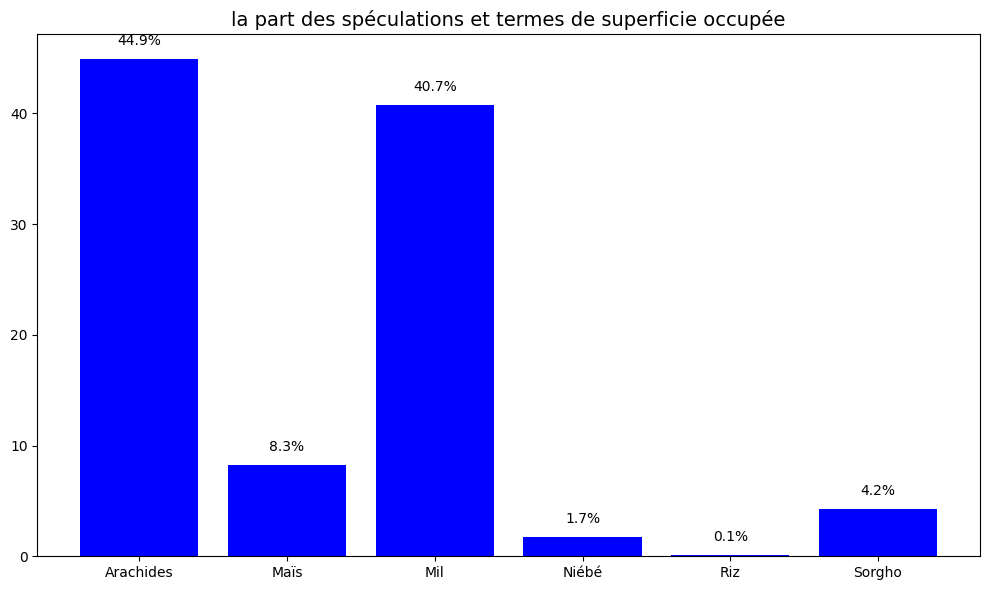

In [15]:
plt.figure(figsize=(10, 6))  # Taille de la figure
plt.bar(superficie_spec["cropname"],superficie_spec["cland"], color='blue')
bars = plt.bar(superficie_spec["cropname"],superficie_spec["cland"], color='blue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # position x centrée sur la barre
        height + 1,                         # position y un peu au-dessus de la barre
        f'{height:.1f}%',                   # texte (formatté avec 1 décimale)
        ha='center', va='bottom', fontsize=10
    )
plt.title('la part des spéculations et termes de superficie occupée', fontsize=14)
plt.tight_layout()  # Ajuste l'espace pour que tout soit bien visible
plt.show()

####  2. le prix de l’arachide par zone

                zone         cpg
0           Kaffrine  232.473822
1    Diourbel-Fatick  322.793696
2    Foundiougne Sud  244.247727
3  Tambacounda-Ouest  237.787918


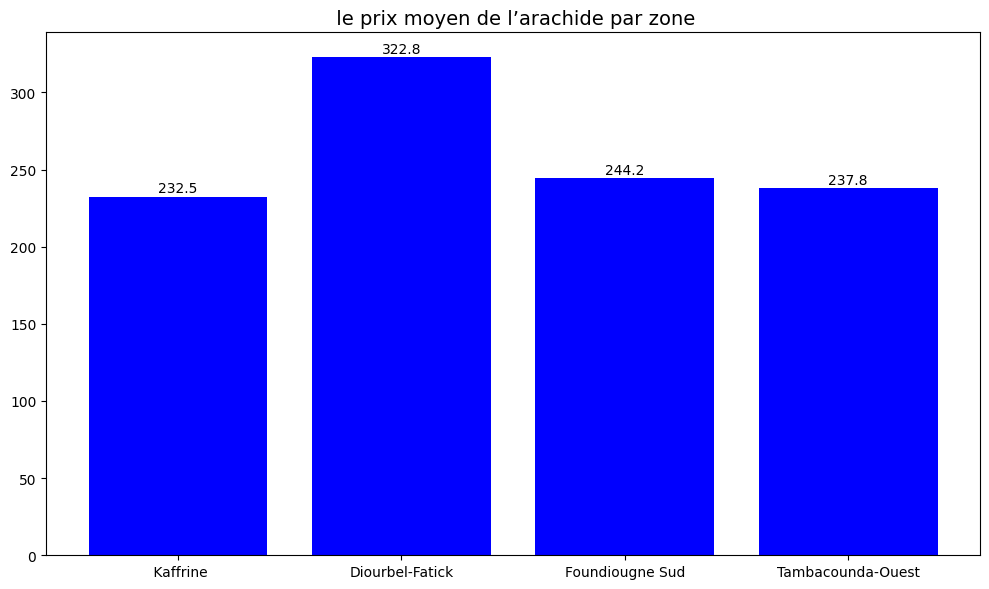

In [16]:
prix_zone = data.groupby("zone")["cpg"].mean().reset_index()
print(prix_zone)
plt.figure(figsize=(10, 6)) 
plt.bar(prix_zone["zone"],prix_zone["cpg"], color='blue')
bars = plt.bar(prix_zone["zone"],prix_zone["cpg"], color='blue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # position x centrée sur la barre
        height + 1,                         # position y un peu au-dessus de la barre
        f'{height:.1f}',                   # texte (formatté avec 1 décimale)
        ha='center', va='bottom', fontsize=10
    )
plt.title(' le prix moyen de l’arachide par zone', fontsize=14)
plt.tight_layout()  
plt.show()

####   3. le rendement de mil par commune

In [17]:
data_mil = data[data["cropname"] == "Mil"]
data_mil.head()


,ID,zone,commune,comcode,cropname,cprod,cqsold,cpg,cgift,cland,...,sum_cprod,sum_area,rendement_spec,autcons,autcons_spec,taux_autocons,sum_sup,part_sup,rendement,autocons
0,198,Diourbel-Fatick,Diouroup,4,Mil,820.0,0,300.0,70,6.0,...,503508.0,1235.8121,407.43085,750.0,427525.0,84.909279,3034.0105,40.731968,136.666667,750.0
1,149,Diourbel-Fatick,Diouroup,4,Mil,500.0,0,300.0,160,3.0,...,503508.0,1235.8121,407.43085,340.0,427525.0,84.909279,3034.0105,40.731968,166.666667,340.0
2,146,Diourbel-Fatick,Diouroup,4,Mil,450.0,0,250.0,100,0.5,...,503508.0,1235.8121,407.43085,350.0,427525.0,84.909279,3034.0105,40.731968,900.000000,350.0
3,196,Diourbel-Fatick,Diouroup,4,Mil,1090.0,0,300.0,90,4.5,...,503508.0,1235.8121,407.43085,1000.0,427525.0,84.909279,3034.0105,40.731968,242.222222,1000.0
4,236,Diourbel-Fatick,Diouroup,4,Mil,500.0,0,300.0,100,2.0,...,503508.0,1235.8121,407.43085,400.0,427525.0,84.909279,3034.0105,40.731968,250.000000,400.0


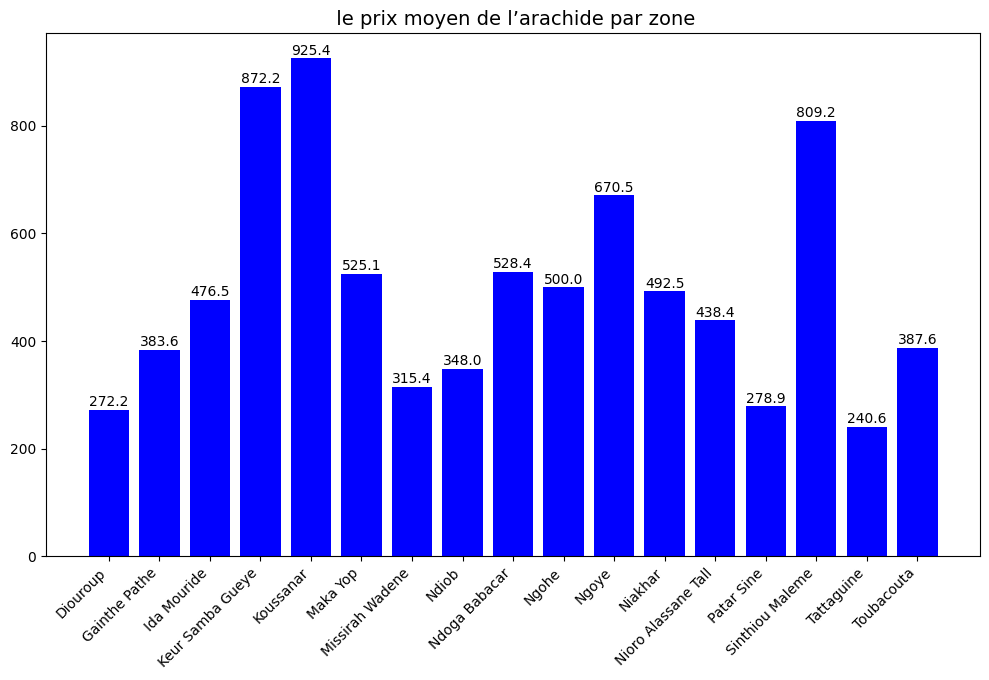

In [18]:
rendement_mil= data.groupby("commune")["rendement"].mean().reset_index()
rendement_mil.head()
plt.figure(figsize=(10, 6)) 
plt.bar(rendement_mil["commune"],rendement_mil["rendement"], color='blue')
bars = plt.bar(rendement_mil["commune"],rendement_mil["rendement"], color='blue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # position x centrée sur la barre
        height + 1,                         # position y un peu au-dessus de la barre
        f'{height:.1f}',                   # texte (formatté avec 1 décimale)
        ha='center', va='bottom', fontsize=10
    )
plt.title(' le prix moyen de l’arachide par zone', fontsize=14)
plt.tight_layout()  
plt.xticks(rotation=45, ha='right')
plt.show()

####  4. la relation entre les d´ epenses en fertilisants fertexp et le rendement de l’arachide

In [19]:
data_arachide = data[data["cropname"] == "Arachides"]
data_arachide.head()

,ID,zone,commune,comcode,cropname,cprod,cqsold,cpg,cgift,cland,...,sum_cprod,sum_area,rendement_spec,autcons,autcons_spec,taux_autocons,sum_sup,part_sup,rendement,autocons
30,150,Diourbel-Fatick,Diouroup,4,Arachides,100.0,0,300.0,0,2.0,...,787203.0,1361.851,578.039,100.0,269852.0,34.27985,3034.0105,44.886166,50.0,100.0
31,235,Diourbel-Fatick,Diouroup,4,Arachides,150.0,0,275.0,0,2.0,...,787203.0,1361.851,578.039,150.0,269852.0,34.27985,3034.0105,44.886166,75.0,150.0
32,147,Diourbel-Fatick,Diouroup,4,Arachides,50.0,0,275.0,0,1.0,...,787203.0,1361.851,578.039,50.0,269852.0,34.27985,3034.0105,44.886166,50.0,50.0
33,236,Diourbel-Fatick,Diouroup,4,Arachides,0.0,0,300.0,0,1.0,...,787203.0,1361.851,578.039,0.0,269852.0,34.27985,3034.0105,44.886166,0.0,0.0
34,312,Diourbel-Fatick,Diouroup,4,Arachides,600.0,400,250.0,50,1.0,...,787203.0,1361.851,578.039,150.0,269852.0,34.27985,3034.0105,44.886166,600.0,150.0


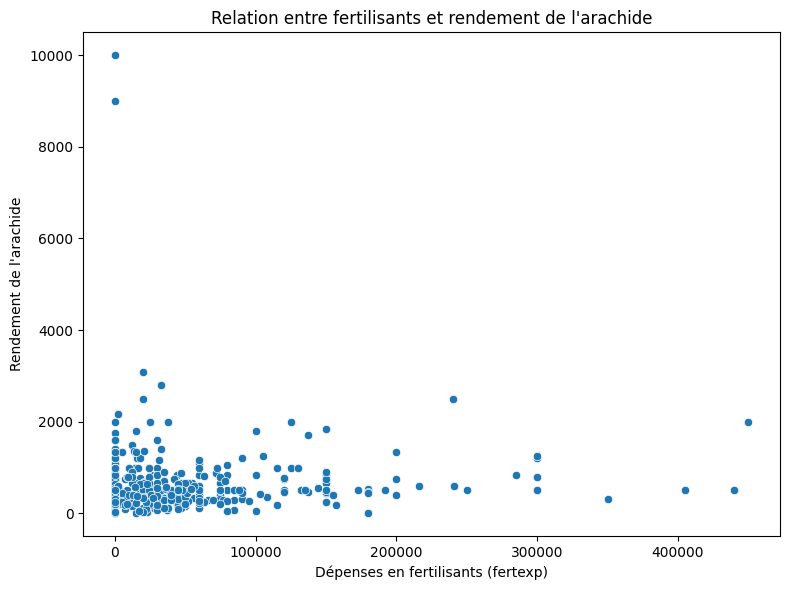

In [20]:
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_arachide, x='fertexp', y='rendement')  
plt.xlabel("Dépenses en fertilisants (fertexp)")
plt.ylabel("Rendement de l'arachide")
plt.title("Relation entre fertilisants et rendement de l'arachide")
plt.tight_layout()
plt.show()


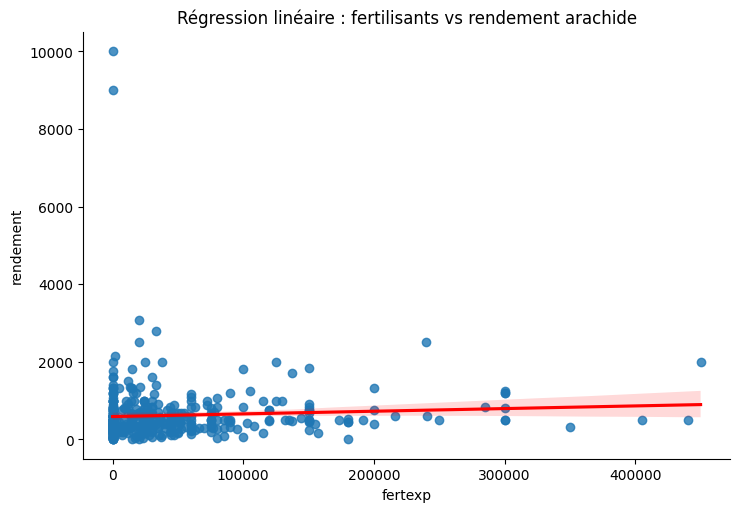

In [21]:
sns.lmplot(data=data_arachide, x='fertexp', y='rendement', aspect=1.5, line_kws={"color": "red"})
plt.title("Régression linéaire : fertilisants vs rendement arachide")
plt.show()


In [22]:
import statsmodels.api as sm

X = data_arachide['fertexp']
y = data_arachide['rendement']

# Ajoute une constante pour l'intercept
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              rendement   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.640
Date:                Fri, 25 Apr 2025   Prob (F-statistic):              0.201
Time:                        01:03:42   Log-Likelihood:                -3374.1
No. Observations:                 419   AIC:                             6752.
Df Residuals:                     417   BIC:                             6760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        587.2394     43.770     13.416      0.0

##  BONUS

In [23]:
arachide = data[data['cropname'] == 'Arachides']
arachide.head()

,ID,zone,commune,comcode,cropname,cprod,cqsold,cpg,cgift,cland,...,sum_cprod,sum_area,rendement_spec,autcons,autcons_spec,taux_autocons,sum_sup,part_sup,rendement,autocons
30,150,Diourbel-Fatick,Diouroup,4,Arachides,100.0,0,300.0,0,2.0,...,787203.0,1361.851,578.039,100.0,269852.0,34.27985,3034.0105,44.886166,50.0,100.0
31,235,Diourbel-Fatick,Diouroup,4,Arachides,150.0,0,275.0,0,2.0,...,787203.0,1361.851,578.039,150.0,269852.0,34.27985,3034.0105,44.886166,75.0,150.0
32,147,Diourbel-Fatick,Diouroup,4,Arachides,50.0,0,275.0,0,1.0,...,787203.0,1361.851,578.039,50.0,269852.0,34.27985,3034.0105,44.886166,50.0,50.0
33,236,Diourbel-Fatick,Diouroup,4,Arachides,0.0,0,300.0,0,1.0,...,787203.0,1361.851,578.039,0.0,269852.0,34.27985,3034.0105,44.886166,0.0,0.0
34,312,Diourbel-Fatick,Diouroup,4,Arachides,600.0,400,250.0,50,1.0,...,787203.0,1361.851,578.039,150.0,269852.0,34.27985,3034.0105,44.886166,600.0,150.0


In [24]:
arachide["indice"] =x

C:\Users\Nora\AppData\Local\Temp\ipykernel_25120\3547875394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arachide["indice"] =x


In [25]:
arachide.head()

,ID,zone,commune,comcode,cropname,cprod,cqsold,cpg,cgift,cland,...,sum_area,rendement_spec,autcons,autcons_spec,taux_autocons,sum_sup,part_sup,rendement,autocons,indice
30,150,Diourbel-Fatick,Diouroup,4,Arachides,100.0,0,300.0,0,2.0,...,1361.851,578.039,100.0,269852.0,34.27985,3034.0105,44.886166,50.0,100.0,0.999639
31,235,Diourbel-Fatick,Diouroup,4,Arachides,150.0,0,275.0,0,2.0,...,1361.851,578.039,150.0,269852.0,34.27985,3034.0105,44.886166,75.0,150.0,0.999639
32,147,Diourbel-Fatick,Diouroup,4,Arachides,50.0,0,275.0,0,1.0,...,1361.851,578.039,50.0,269852.0,34.27985,3034.0105,44.886166,50.0,50.0,0.999639
33,236,Diourbel-Fatick,Diouroup,4,Arachides,0.0,0,300.0,0,1.0,...,1361.851,578.039,0.0,269852.0,34.27985,3034.0105,44.886166,0.0,0.0,0.999639
34,312,Diourbel-Fatick,Diouroup,4,Arachides,600.0,400,250.0,50,1.0,...,1361.851,578.039,150.0,269852.0,34.27985,3034.0105,44.886166,600.0,150.0,0.999639


In [26]:

import statsmodels.api as sm

# Variables explicatives
X = arachide[['if_extworkers', 'seedsexp', 'fertexp', 'cpg', 'indice']]

# Variable dépendante
y = arachide['rendement']

# Ajout de la constante
X = sm.add_constant(X)

# Modèle de régression linéaire
model = sm.OLS(y, X).fit()

# Résultats
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              rendement   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.936
Date:                Fri, 25 Apr 2025   Prob (F-statistic):             0.0205
Time:                        01:03:42   Log-Likelihood:                -3369.0
No. Observations:                 419   AIC:                             6748.
Df Residuals:                     414   BIC:                             6768.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
if_extworkers   105.4144    113.438      0.929